In [40]:
from ucimlrepo import fetch_ucirepo 

In [41]:
# Get all the packages we need to use in the project
# to visualize the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# libraries for data manipulation
import pandas as pd
import numpy as np

# to preprocess the data 
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer


Fetch the dataset to be used in the project 


In [42]:
heart_disease = fetch_ucirepo(id=45) 

### load the data in form of pandas dataframe


In [43]:
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

Get the meta information about the dataset 

In [44]:
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [45]:
# print out the values of the first 5 rows of the features 
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  


In [46]:
# get the first values of the target variable
print(y.head()) 

   num
0    0
1    2
2    1
3    0
4    0


In [47]:
# combine the dataframes to create a single dataframe for easy analysis
heart_data = pd.concat([X, y], axis=1) 
print(heart_data.head())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


# Exploratory Data Analysis (EDA)

In [48]:
# get insights about the data in each column
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [49]:
# get the shape of the dataframe
heart_data.shape


(303, 14)

In [50]:
# describe the data in each column
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


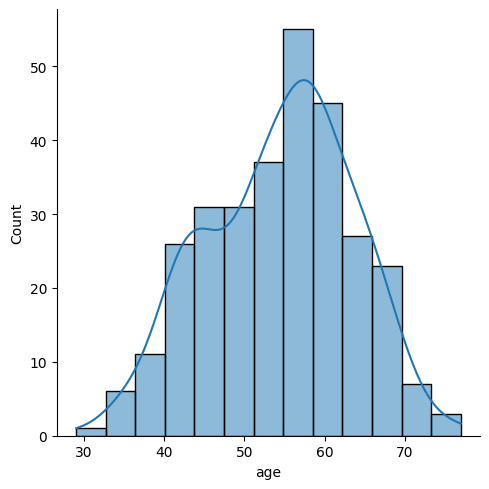

In [51]:
# get an understanding of the distribution of the age column
sns.displot(heart_data['age'], kde=True)
plt.show()

<Axes: xlabel='sex', ylabel='age'>

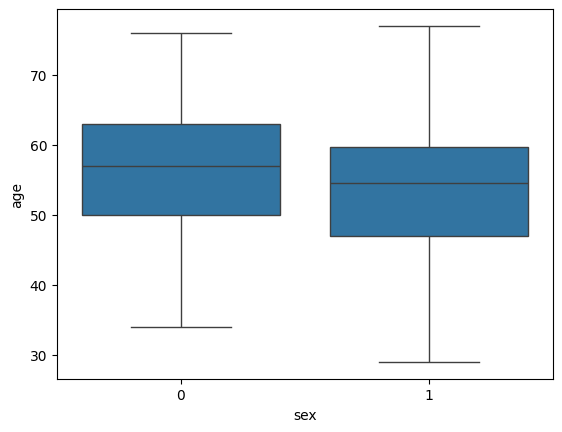

In [52]:
# Lets explore the age column based on gender 
sns.boxplot(x='sex', y='age', data=heart_data)

In [53]:
# get the values of the sex column 
print(heart_data['sex'].unique())

# print the count of the sex column 
print(heart_data['sex'].value_counts())

[1 0]
sex
1    206
0     97
Name: count, dtype: int64


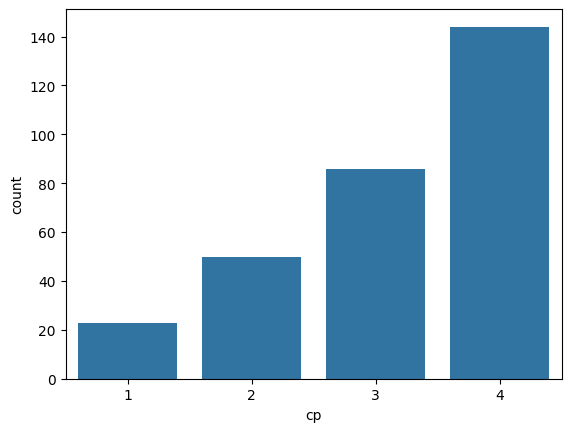

In [54]:
# chest pains distribution
sns.countplot(x='cp', data=heart_data)
plt.show()

### understanding the values of the chest pain column
cp: chest pain type
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic


## Understanding the chest pain type 
Asymptomatic: Asymptomatic means that individuals do not exhibit the typical symptoms associated with heart problems, such as chest pain.

Non-Anginal Chest Pain: Non-anginal chest pain refers to discomfort that deviates from the typical pattern of angina. It may not be triggered by physical activity and can have various characteristics.

Atypical Angina: Atypical angina maintains a connection to the heart but diverges from the classic symptoms commonly associated with typical angina. It may have different qualities compared to the usual anginal pain.

Angina and Heart Disease: Angina is closely entwined with heart disease. It serves as a symptom, signaling an underlying issue with the blood supply to the heart. Typically associated with coronary artery disease (CAD), angina indicates a potential lack of oxygen and nutrients reaching the heart muscle, urging individuals to seek prompt medical attention.



<Axes: xlabel='cp', ylabel='count'>

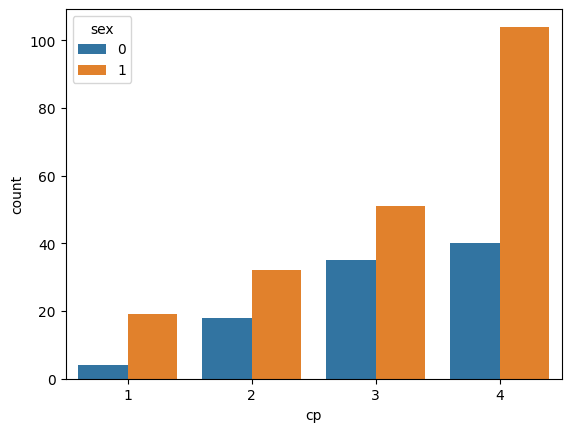

In [55]:
# get the chest pain based on gender
# count plot of cp column by sex
sns.countplot(heart_data,x='cp',hue='sex')

### understanding the trestbps column
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)

- trestbps: The normal resting blood pressure is 120/80 mm Hg.



In [56]:
heart_data['trestbps'].min()

94

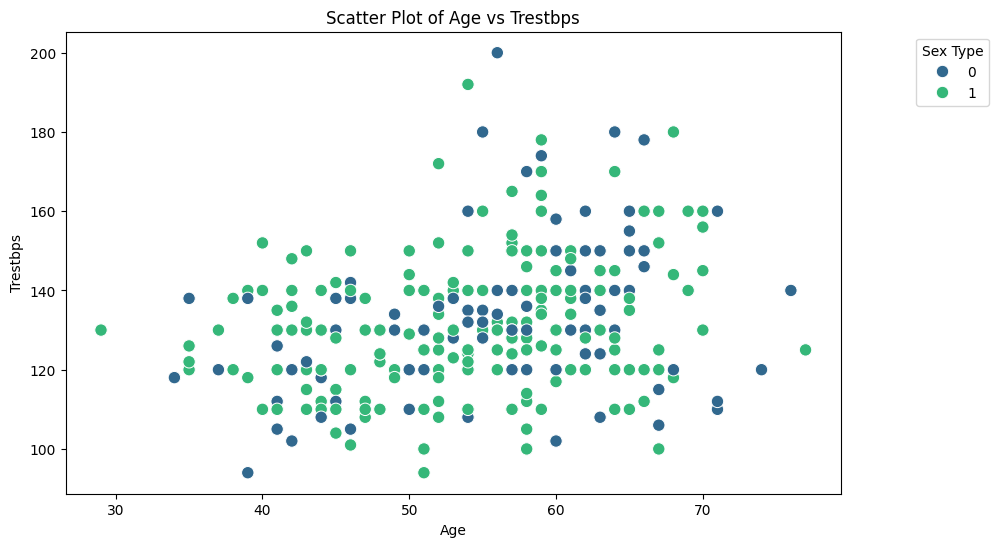

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart_data, x='age', y='trestbps', hue='sex', palette='viridis', s=80)

plt.title('Scatter Plot of Age vs Trestbps')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.legend(title='Sex Type', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

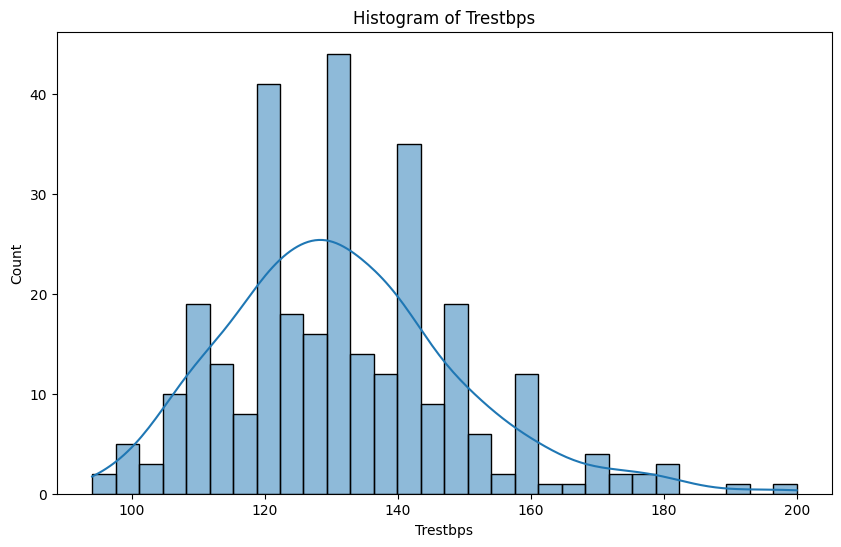

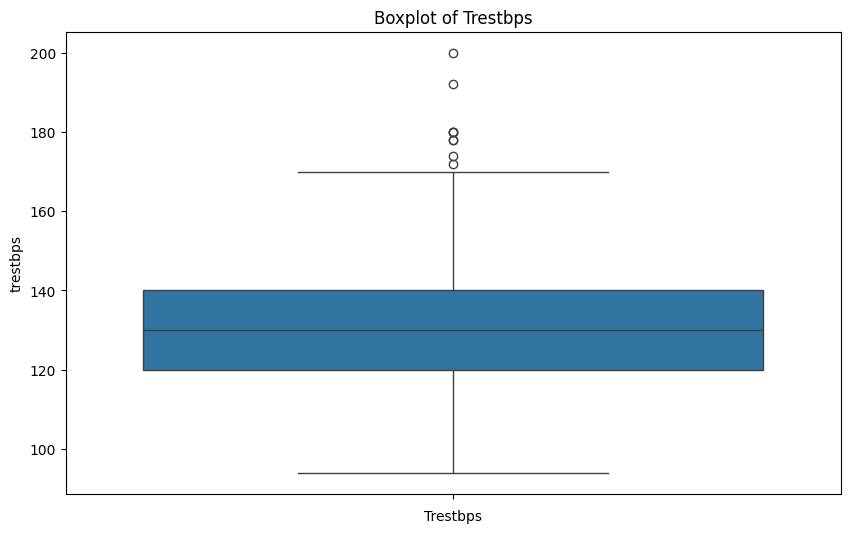

In [58]:
# create a histogram of trestbps
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['trestbps'], kde=True, bins=30)
plt.title('Histogram of Trestbps')
plt.xlabel('Trestbps')
plt.show()
# create a boxplot of trestbps
plt.figure(figsize=(10, 6))
sns.boxplot(heart_data['trestbps'])
plt.title('Boxplot of Trestbps')
plt.xlabel('Trestbps')
plt.show()

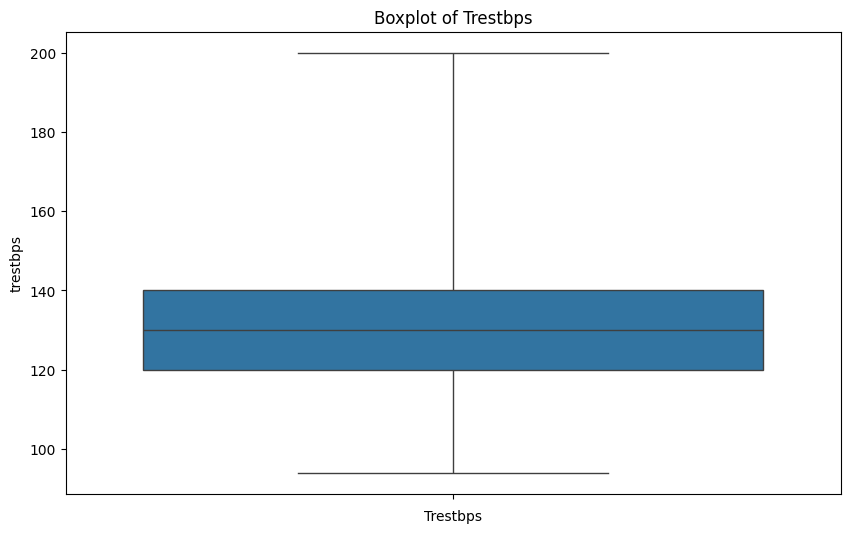

In [59]:
# look for outliers in trestbps
plt.figure(figsize=(10, 6))
sns.boxplot(heart_data['trestbps'], whis=3)
plt.title('Boxplot of Trestbps')
plt.xlabel('Trestbps')
plt.show()


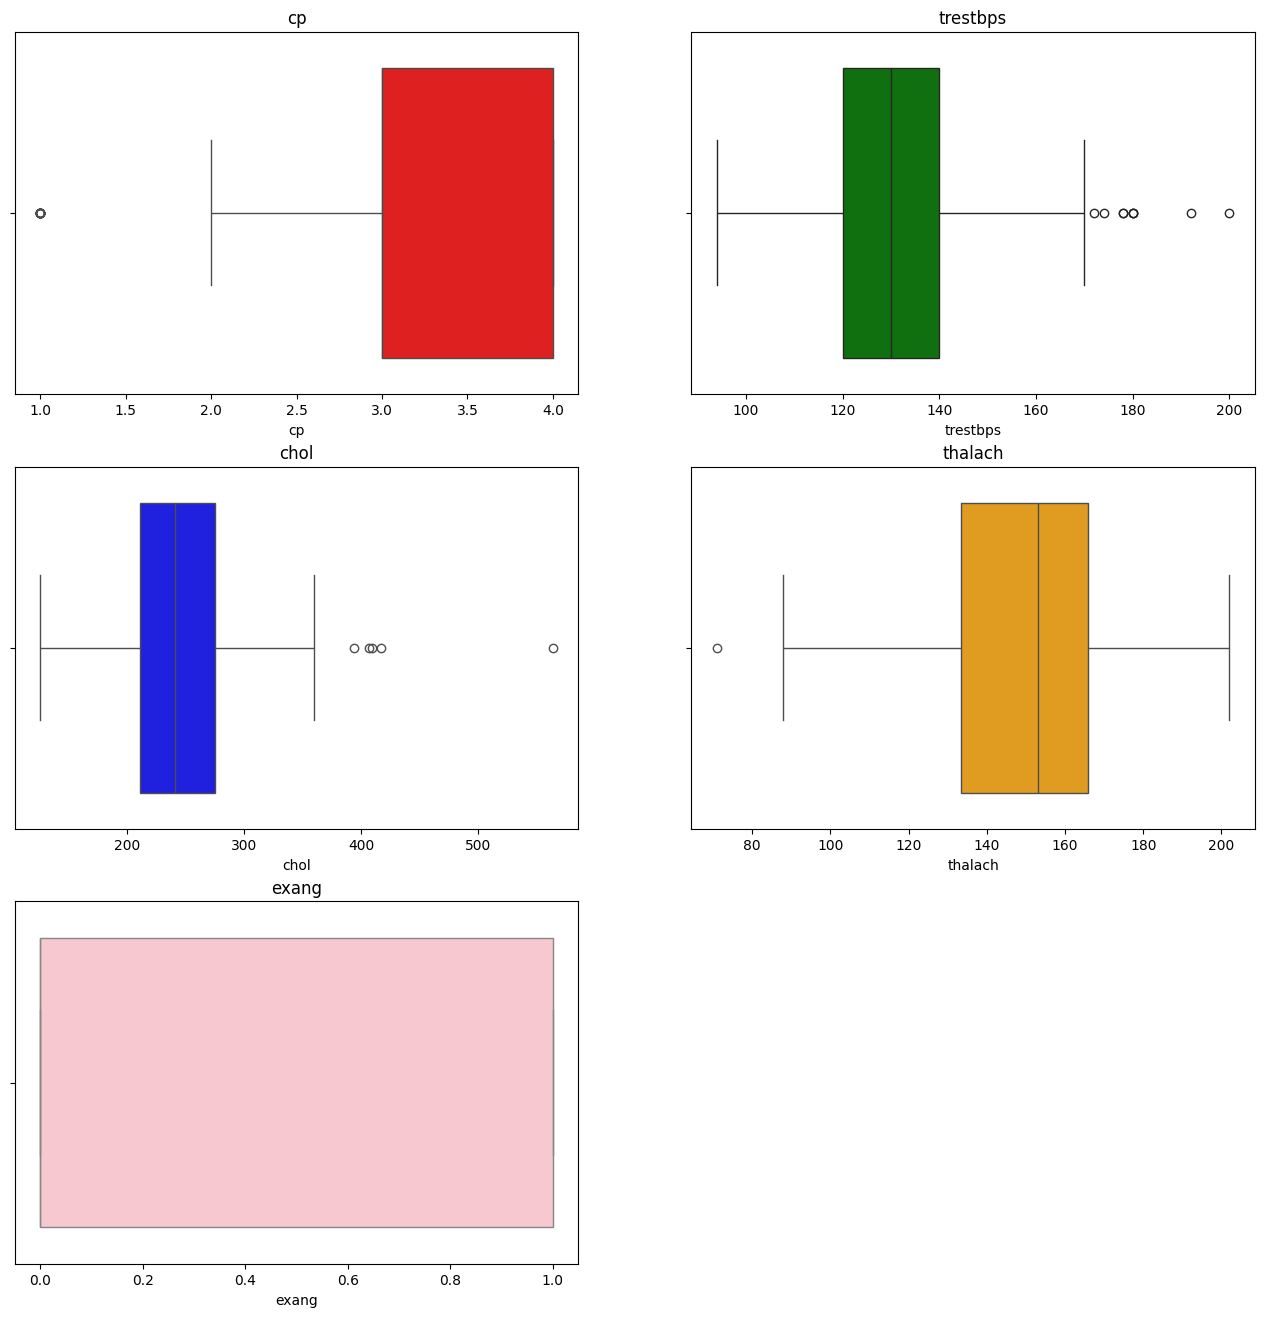

In [60]:

# look for outliers in cp, trestbps, chol , thalach, and exang columns
desired_columns = ['cp', 'trestbps', 'chol', 'thalach', 'exang']

plt.figure(figsize=(16,16))

color = ['red','green','blue','orange','pink']

for i, col in enumerate(desired_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=heart_data[col],color=color[i])
    plt.title(col)

plt.show()

In [62]:
# get the cholesterol column
heart_data['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64


Average Cholesterol Levels by Heart Disease Severity:
- Class 0 (No Heart Disease): 227.91 mg/dl
- Class 1 (Mild Heart Disease): 195.26 mg/dl
- Class 2 (Moderate Heart Disease): 143.86 mg/dl
- Class 3 (Severe Heart Disease): 159.72 mg/dl
- Class 4 (Very Severe Heart Disease): 192.15 mg/dl



/var/folders/yy/2rn2rrb9573_57tv1cf98bqr0000gn/T/ipykernel_17980/2143952411.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




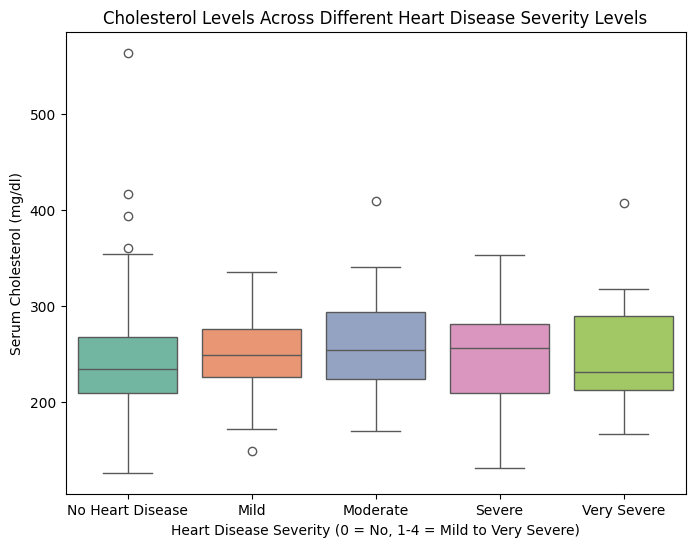

In [61]:
# Visualizing the cholesterol comparison using a boxplot for all five classes of heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='chol', data=heart_data, palette='Set2')
plt.title('Cholesterol Levels Across Different Heart Disease Severity Levels')
plt.xlabel('Heart Disease Severity (0 = No, 1-4 = Mild to Very Severe)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.xticks([0, 1, 2, 3, 4], ['No Heart Disease', 'Mild', 'Moderate', 'Severe', 'Very Severe'])
plt.show()

In [63]:
# get the thalach column
heart_data['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [65]:
# get  the correlation matrix between the features
correlation_matrix = heart_data.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


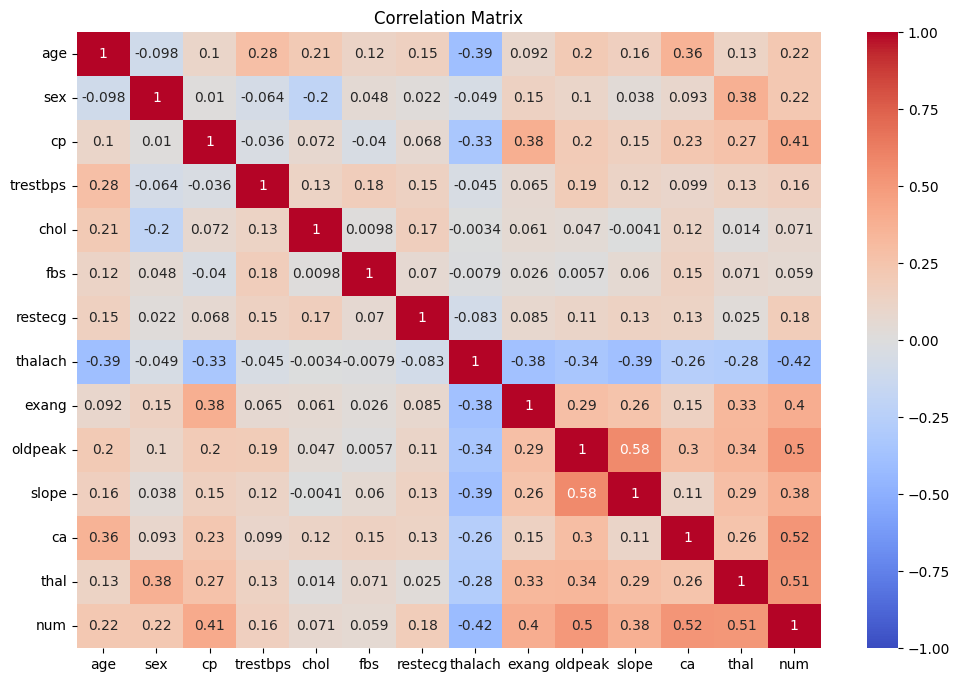

In [66]:
# plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()